
 Дані успішно завантажено!

 Дані підготовлені: категоріальні змінні закодовані, числові масштабовані.

 Дані розбиті: 80% - навчальна вибірка, 20% - тестова.

 SVM-модель побудована та навчена!



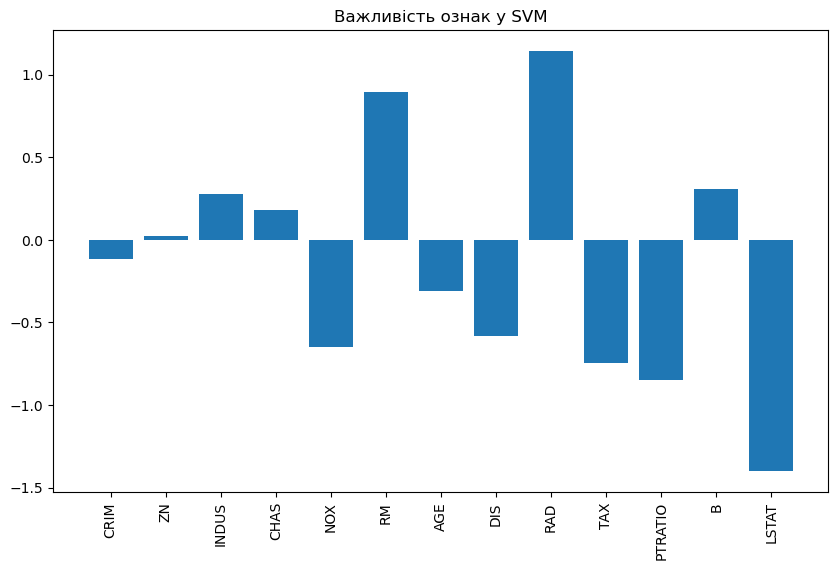

 Точність моделі: 0.85294

Confusion Matrix:
[[51  9]
 [ 6 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        60
           1       0.80      0.86      0.83        42

    accuracy                           0.85       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.86      0.85      0.85       102

 Оптимізація моделі...

 Найкращі параметри: {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}

 Оптимізована точність: 0.89216

Оптимізована Confusion Matrix:
[[52  8]
 [ 3 39]]

Оптимізований Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.83      0.93      0.88        42

    accuracy                           0.89       102
   macro avg       0.89      0.90      0.89       102
weighted avg       0.90      0.89      0.89       102



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Завантаження власних даних
df = pd.read_csv("boston.csv")
print("\n Дані успішно завантажено!\n")

# 2. Попередня підготовка даних
le = LabelEncoder()
df['CHAS'] = le.fit_transform(df['CHAS'])  # Перетворення категоріальних змінних
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)
print(" Дані підготовлені: категоріальні змінні закодовані, числові масштабовані.\n")

# Визначаємо вхідні ознаки та цільову змінну
X = df.drop(columns=['MEDV'])
y = (df['MEDV'] > df['MEDV'].median()).astype(int)  # Бінаризація для класифікації

# 3. Розбиття на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(" Дані розбиті: 80% - навчальна вибірка, 20% - тестова.\n")

# 4. Побудова SVM-моделі
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
print(" SVM-модель побудована та навчена!\n")

# Візуалізація коефіцієнтів
plt.figure(figsize=(10, 6))
plt.bar(X.columns, svm_model.coef_[0])
plt.xticks(rotation=90)
plt.title("Важливість ознак у SVM")
plt.show()

# 5. Прогноз та оцінка якості моделі
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f" Точність моделі: {accuracy:.5f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Підбір оптимальних параметрів
print(" Оптимізація моделі...\n")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f" Найкращі параметри: {grid_search.best_params_}\n")

# 7. Оцінка оптимальної моделі
optimized_svm = SVC(**grid_search.best_params_, random_state=42)
optimized_svm.fit(X_train, y_train)
opt_pred = optimized_svm.predict(X_test)
opt_accuracy = accuracy_score(y_test, opt_pred)
opt_conf_matrix = confusion_matrix(y_test, opt_pred)
print(f" Оптимізована точність: {opt_accuracy:.5f}\n")
print("Оптимізована Confusion Matrix:")
print(opt_conf_matrix)
print("\nОптимізований Classification Report:")
print(classification_report(y_test, opt_pred))